# MNIST - Digit Recognizer

The Dataset is from here https://www.kaggle.com/competitions/digit-recognizer/data

We are using SVM as one of the classifications methods to identify handwritten digits based on the pixels values inthe data set. More information on data sets is in the next section:


### Explaination of data sets

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# For Model building
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# For metric evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# For Cross validation and regularization model building
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# For scaling
from sklearn.preprocessing import scale

## Data Reading

In [3]:
'''Downloaded the data set from Kaggle: https://www.kaggle.com/competitions/digit-recognizer/data. Extracting only the 
train data set '''
digit = pd.read_csv("train.csv")
digit.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The training data set, (train.csv), has 785 columns. The first column is "label" - indicates the number drawn based on the pixel values in the subsequent columns(the rest of 784 columns).

In [4]:
digit.shape #Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total = 784 columns

(42000, 785)

In [5]:
digit.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [6]:
#Checking for amount of times the value has been drawn 

digit.label.value_counts().sort_index(ascending=True)

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

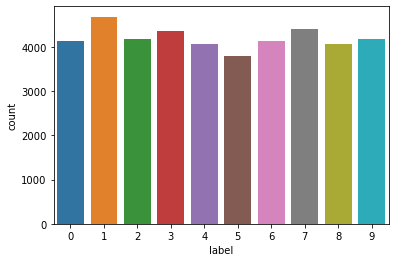

In [7]:
#representing the counts on a bar plot
sns.countplot(digit["label"])
plt.show()

In [8]:
digit.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


### Data Cleaning and Scaling

In [9]:
'''Checking for missing values in the train data set '''

digit.isnull().sort_index(axis =0).values.any()

False

"False" indicates that there are no null/missing values in the dataset. We have a clean dataset

In [10]:
'''Checking for correlation between various labels by taking their means'''
mean_digit = digit.groupby('label').mean()
mean_digit.sort_index()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.846626,0.939105,0.397182,0.086344,0.118155,0.027267,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='label'>

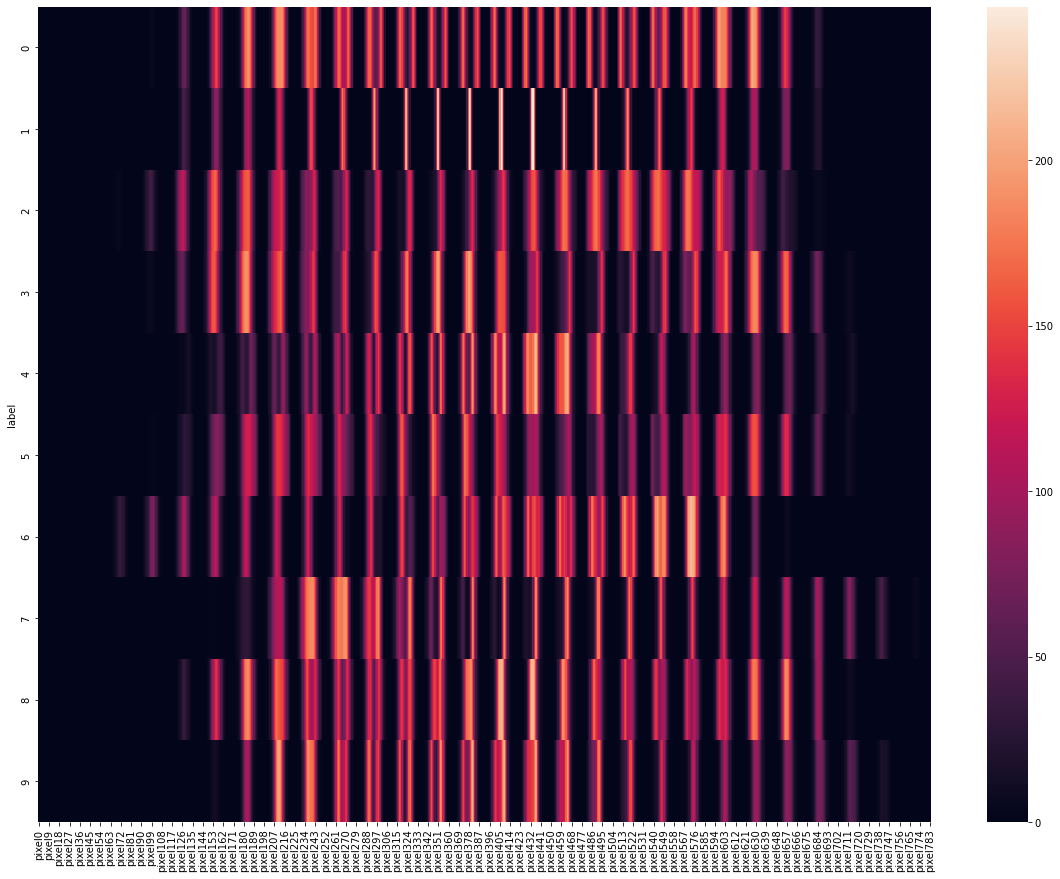

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(mean_digit)

In [12]:
'''The whole dataset is of numerical datatype. There are NO categorical variables. There is no need to convert them
categorical datatype'''
digit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [13]:
#digit = digit.sort_values('label')
digit.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Digit Label: 4


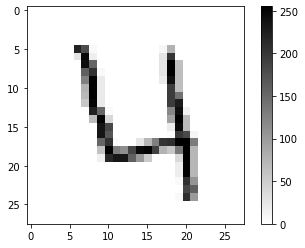

In [14]:
'''Reading one of the digits'''

digit_arr = digit.loc[3, "pixel0":]
arr = np.array(digit_arr) 

image_arr = np.reshape(arr, (28,28))

digit_image = plt.imshow(image_arr, cmap=plt.cm.binary)
plt.colorbar(digit_image)
print("Digit Label: {}".format(digit.loc[3, "label"]))





**Few Conclusions based on EDA:**
- No need of any outlier treatment as we have to consider all the values. All these values contribute to the construction of a pixelated image.
- No need to use any dummy variables or convert them to categorical data type as the whole data set is of numerical or integer data type. 
- Scaling and Normalization can be performed. 

In [15]:
'''Spliting the label column from the dataset'''
X = digit.drop("label", axis = 1)
y = digit['label']

### Train-Valid split

In [16]:
'''Spliting the dataset into Train and Valid. Alloting 30% of the data to validation data set'''
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 101)

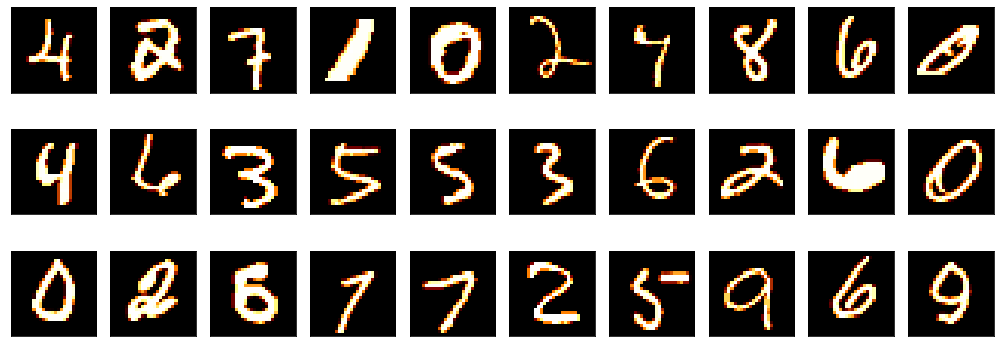

In [17]:
'''Plotting some digits from train dataset'''

plt.figure(figsize=(14,12))
for digit_num in range(0,30):
    plt.subplot(7,10,digit_num+1)
    grid_data = X_train.iloc[digit_num].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

In [18]:
'''Dimensions of Train and Validation datasets'''
print("Train_pixels = ", format(X_train.shape) + "\n"
     "Train_o_label = ", format(y_train.shape) + "\n"
     "Valid_pixels = ", format(X_valid.shape) + "\n"
     "Valid_o_label = ", format(y_valid.shape) + "\n")

Train_pixels =  (29400, 784)
Train_o_label =  (29400,)
Valid_pixels =  (12600, 784)
Valid_o_label =  (12600,)



## Feature Scaling, PCA decomposition and Model Building

Since we have a high number of dimensions, it makes sense to reduce remove any dimensions/features which cause a high amount of redundancy and focus on the dimensions which are actually required to predict the output. Before applying PCA, it is necessary we standardize both the training and validation datasets.

### Min-Max Scaling on Train and Validation datasets

In [19]:
'''Before applying PCA'''

from sklearn.preprocessing import MinMaxScaler
#Scaling data
scale = MinMaxScaler()

# Scaling train data-set
X_train_scaled = scale.fit_transform(X_train)


# Scaling validation data-set
X_valid_scaled = scale.fit_transform(X_valid)

### PCA Decomposition

In [20]:
'''function to run PCA and SVC with different kernel types'''
from sklearn.decomposition import PCA
# pca = decomposition.PCA()
def n_components_accuracy(n,X_train, y_train, X_valid, y_valid, k_type):
    pca = PCA(n_components = n)
    print("n_components = ", format(n))
    pca.fit(X_train)
    pca_X_train = pca.transform(X_train)
    pca_X_val = pca.transform(X_valid)
    
    svc_applied = SVC(kernel = k_type)
    svc_applied.fit(pca_X_train,y_train)
    svc_predict_label = svc_applied.predict(pca_X_val)
    accuracy_svc = metrics.accuracy_score(y_valid,svc_predict_label)
    print("Accuracy = ", format(accuracy_svc))
    return accuracy_svc

# pca = decomposition.PCA()
# pca.n_components = 2
# pca_data_train = pca.fit_transform(X_train)
# pca_data_valid = pca.fit_transform(X_valid)

In [21]:
'''we typically want the 85-95% of the data explaining the variance. So we check for explaination of variance 
when n_components are from .85 to .95'''

n_component_list = np.linspace(0.85,0.95,num=10)
accuracy = []
def pca_svc(n_component_list,kernel_name):
    print("Running SVC with kernel type = ", format(kernel_name))
    for n in n_component_list:
        acc= n_components_accuracy(n,X_train_scaled, y_train, X_valid_scaled, y_valid, kernel_name)
        accuracy.append(acc)
    



In [22]:
# pca_svc(n_component_list,"linear")

In [23]:
# del accuracy
# accuracy = []
# pca_svc(n_component_list,"rbf")

In [24]:
# plt.figure()
# plt.plot(n_component_list,np.array(accuracy),label='Accuracy vs % variance explained')
# plt.legend()
# plt.show()

From the above we can see that the accuracy peaked around 0.86. So, we are considering n_components for PCA to be 0.86

In [25]:
# from sklearn import metrics
# from sklearn.metrics import confusion_matrix
# metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred_rbf)+

### Summary of accuracies from Linear and RBF model(Non-Linear model) of SVC

#### Linear Model
- Linear model gives us an accuracy of 99% on train data and 91% on test data
- This case may lead to overfitting and predict inaccurate results on test data.

#### RBF or Non - Linear Model
- This model gives us an accuracy of 92% on train and 90.5% on test data.
- This model is an optimal model. We can see that there is no extreme case of overfitting and the accuracy of test and train data is almost similar to each other.

#### We will proceed with RBF model.


### Optimising hyperparameter (Using Gridsearch)

In [26]:
# Creating a KFold object with 5 splits 
#folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# Setting the parameters for cross-validation
#hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
#                     'C': [1, 10, 20]}]


# Specifying kernel to be used for model building
#model = SVC(kernel="rbf")

# Setting up GridSearchCV
#model_cv = GridSearchCV(estimator = model, 
#                        param_grid = hyper_params, 
#                        scoring= 'accuracy', 
#                        cv = 4,
#                        n_jobs=-1,
#                        verbose = 1,
#                        return_train_score=True)      

# Fitting the model
#model_cv.fit(X_train_scaled, y_train)

In [27]:
# cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results.head()

In [28]:
#cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results.sort_values('mean_test_score',ascending=False)

Based on the above, the optimal hyper parameters for SVC are C = 10 and gamma = 0.01

In [29]:
# Optimal accuracy score and hyperparameters
#best_score = model_cv.best_score_
#best_hyperparams = model_cv.best_params_

#print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

### Building the model with optimal hyperparameters


In [30]:
# Model with optimal hyperparameters
pca = PCA(n_components = 0.86)
pca.fit(X_train)
pca_X_train = pca.transform(X_train_scaled)
pca_X_val = pca.transform(X_valid_scaled)


In [31]:
model_final = SVC(C=10, gamma=0.01, kernel="rbf")
model_final.fit(pca_X_train, y_train) # Fitting the model

SVC(C=10, gamma=0.01)

In [32]:
#model_final.fit(pca_X_val, y_train)
# Prediction on train dataset for Non-linear model
y_train_pred_label = model_final.predict(pca_X_train)

# Prediction on validation dataset for Non-linear model
y_valid_pred_label = model_final.predict(pca_X_val)

In [33]:
metrics.accuracy_score(y_train, y_train_pred_label)#accuracy on train data 

0.9975850340136054

In [34]:
metrics.accuracy_score(y_valid, y_valid_pred_label)#accuracy on validation data 

0.979920634920635

In [35]:
print(metrics.classification_report(y_valid, y_valid_pred_label))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1240
           1       0.99      0.99      0.99      1405
           2       0.98      0.98      0.98      1253
           3       0.98      0.97      0.98      1305
           4       0.98      0.98      0.98      1222
           5       0.98      0.97      0.97      1139
           6       0.98      0.99      0.99      1241
           7       0.98      0.98      0.98      1320
           8       0.98      0.98      0.98      1219
           9       0.97      0.97      0.97      1256

    accuracy                           0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600



## Evaluating on unknown test data (from Kaggle)

Considering the test.csv from kaggle website - https://www.kaggle.com/competitions/digit-recognizer/data to predict the label column. Once we have the predicted labels, the output is uploaded to Kaggle for an accuracy score. 

In [36]:
test_data = pd.read_csv('test.csv')# downloaded from https://www.kaggle.com/c/digit-recognizer/data
test_data.head()# this data set has no 'label' column

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
pca_X_val.shape

(12600, 63)

In [38]:
pca_X_train.shape
# pca_X_train = pd.DataFrame(pca_X_train)


(29400, 63)

In [39]:
pca_X_train.shape

(29400, 63)

In [40]:
test_data = test_data[X_train.columns]

In [41]:
X_train_scaled.shape

(29400, 784)

In [42]:
test_data.shape

(28000, 784)

In [43]:
pca_X_train.shape

(29400, 63)

In [44]:

# mnist_test_arr = np.array(test_data)
# mnist_test_arr = mnist_test_arr.reshape(mnist_test_arr.shape[0], 28, 28, 1)

test_data_scaled = scale.transform(test_data)#feature scaling the data using minmax scaler.
# test_data=(test_data-X.min())/(X.max()-X.min())
# X_t=df_test[X.columns]
# Doing the PCA transform
# X_trans=pca.transform(X_t)

In [45]:
test_data_scaled.shape

(28000, 784)

In [46]:
# pca = PCA(n_components = 0.86)
# pca.fit(test_data)
pca_X_test = pca.transform(test_data_scaled)

In [47]:
pca_X_test.shape

(28000, 63)

In [48]:
y_pred_final = model_final.predict(pca_X_test) #predicting on test data..

In [49]:
y_pred_final

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [50]:
id = np.arange(1,28001,1)#creating a data frame with imageid and predicted label to submit it on kaggle.
kaggle_df = pd.concat([pd.Series(id),pd.Series(y_pred_final)],axis=1)
kaggle_df.columns = ['ImageId','Label']
kaggle_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [51]:
kaggle_df.to_csv('mnist.csv',index=False)#exporting is as csv file, submitting it on kaggle and to recieve a score. 

![image-2.png](attachment:image-2.png)

![image.png](attachment:image.png)

### Submitting the above result in Kaggle gives me a score of 0.97946

## CNN Model

Convolutional neural networks (CNN) – the concept behind recent breakthroughs and developments in deep learning.

CNNs have broken the mold and ascended the throne to become the state-of-the-art computer vision technique. Among the different types of neural networks (others include recurrent neural networks (RNN), long short term memory (LSTM), artificial neural networks (ANN), etc.), CNNs are easily the most popular.

These convolutional neural network models are ubiquitous in the image data space. They work phenomenally well on computer vision tasks like image classification, object detection, image recognition, etc.

So – where can you practice your CNN skills? Well, you’ve come to the right place!

There are various datasets that you can leverage for applying convolutional neural networks. Here are three popular datasets:

* MNIST
* CIFAR-10
* ImageNe

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
#from keras.layers.normalization import BatchNormalization

import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
#from keras.layers import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from tensorflow.keras import backend as K

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical

In [53]:
#creating new dataframe
digit1 = digit

Set data features and labels

In [54]:
X = digit1.drop(['label'], 1).values
y = digit1['label'].values

Reshape

In [55]:
X = X / 255.0

In [56]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
# canal = 1 => For gray scale
X = X.reshape(-1,28,28,1)

One-Hot Encoding

In [57]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
y = to_categorical(y)

print(f"Label size {y.shape}")

Label size (42000, 10)


Split training and valdiation set

In [58]:
# Split the train and the validation set for the fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

Normalization

In [60]:
mean = np.mean(X_train)
std = np.std(X_train)

def standardize(x):
    return (x-mean)/std

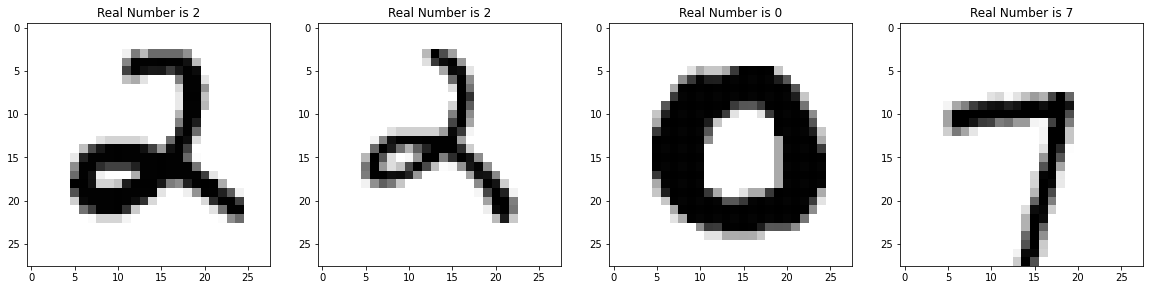

In [61]:
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

Model Definition

In [62]:
model=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))    
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

Data augmentation

In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.

For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated...

Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.

By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.

In [64]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.01, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


#datagen.fit(X_train)
train_gen = datagen.flow(X_train, y_train, batch_size=128)
test_gen = datagen.flow(X_test, y_test, batch_size=128)

For the data augmentation, i choosed to :

* Randomly rotate some training images by 10 degrees
* Randomly Zoom by 10% some training images
* Randomly shift images horizontally by 10% of the width
* Randomly shift images vertically by 10% of the height


Model training

In [65]:
epochs = 5
batch_size = 128
train_steps = X_train.shape[0] // batch_size
valid_steps = X_test.shape[0] // batch_size

es = keras.callbacks.EarlyStopping(
        monitor="val_acc", # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, # 
     )

rp = keras.callbacks.ReduceLROnPlateau(
        monitor="val_acc",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [66]:
# Fit the model
history = model.fit_generator(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = train_steps,
                              validation_data = test_gen,
                              validation_steps = valid_steps, 
                              callbacks=[es, rp])

Epoch 1/5
295/295 [==============================] - 127s 424ms/step - loss: 0.1536 - accuracy: 0.9522 - val_loss: 2.7679 - val_accuracy: 0.2236 - lr: 0.0010
Epoch 2/5
295/295 [==============================] - 109s 370ms/step - loss: 0.0610 - accuracy: 0.9812 - val_loss: 0.0993 - val_accuracy: 0.9668 - lr: 0.0010
Epoch 3/5
295/295 [==============================] - 107s 362ms/step - loss: 0.0521 - accuracy: 0.9828 - val_loss: 0.0646 - val_accuracy: 0.9783 - lr: 0.0010
Epoch 4/5
295/295 [==============================] - 103s 349ms/step - loss: 0.0438 - accuracy: 0.9868 - val_loss: 0.0446 - val_accuracy: 0.9875 - lr: 0.0010
Epoch 5/5
295/295 [==============================] - 97s 330ms/step - loss: 0.0353 - accuracy: 0.9880 - val_loss: 0.0564 - val_accuracy: 0.9832 - lr: 0.0010


Plot CNN model

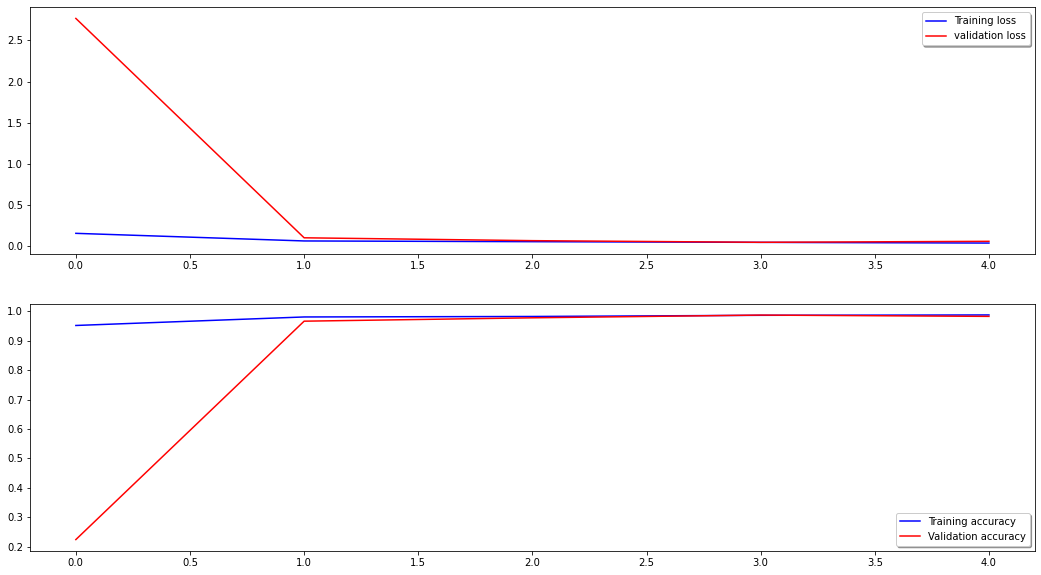

In [67]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

Confusion matrix

Confusion matrix can be very helpfull to see your model drawbacks.

We plot the confusion matrix of the validation results.

132/132 [==============================] - 4s 28ms/step


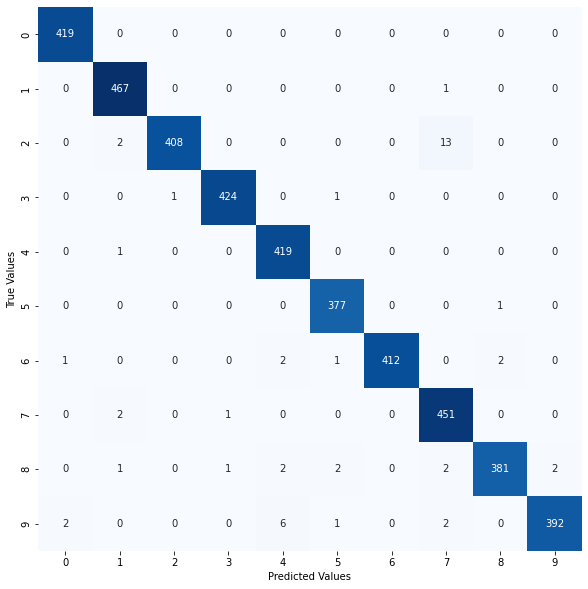

In [68]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(X_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

Prediction validation results

132/132 [==============================] - 4s 28ms/step


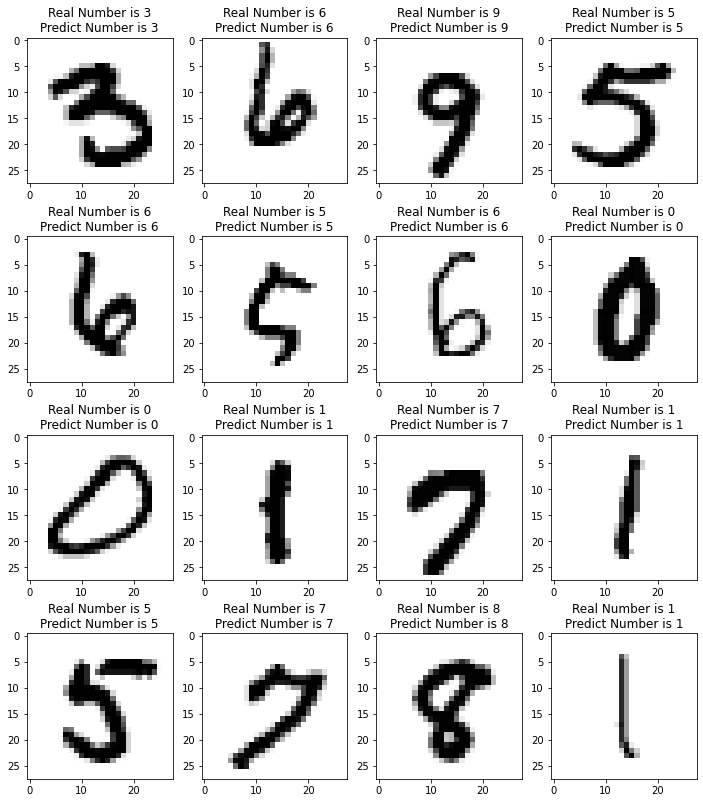

In [69]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

## Conclusion
